## Análisis de reactivaciones a partir del envío de mails

En este notebook buscamos analizar cómo impacta la campaña de mailing para reactivar socios de acuerdo a los días que pasaron inactivos (sin compra ni canjes). Para realizar ese envío de mail, extraemos las bases del DW usando el notebook "Segmentacion ultima actividad" y los datos de aperturas de mail vienen de la plataforma Emblue

In [2]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

import datetime as dt
import glob

pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 10000)

#### Importo archivos con aperturas de mails

Si me pasan una carpeta con varios csv de aperturas, así puedo leerlos todos juntos y apendarlos en una única tabla

In [3]:
path = r''
all_files = glob.glob(path + "\*.csv")

envios_efectivos = pd.concat((pd.read_csv(f,delimiter = ";",encoding='utf16') for f in all_files))
envios_efectivos.head()

,FECHA,EMAIL,ACTIVIDAD,CAMPANIA,ACCION
0,2022-04-17 04:01:16.870,a.b.carrizo.estrada13@gmail.com,Aperturas Originales,ABRIL 2022,R1 Recu 2y3 M ACT
1,2022-04-16 19:47:46.027,a.fernandezarias@hotmail.com,Aperturas Originales,ABRIL 2022,R1 Recu 2y3 M ACT
2,2022-04-18 12:58:36.827,a_d_a-aldy@hotmail.com.ar,Aperturas Originales,ABRIL 2022,R1 Recu 2y3 M ACT
3,2022-04-16 17:57:38.817,a_ligonie@hotmail.com,Aperturas Originales,ABRIL 2022,R1 Recu 2y3 M ACT
4,2022-04-16 18:21:11.470,a_salack@yahoo.com.ar,Aperturas Originales,ABRIL 2022,R1 Recu 2y3 M ACT


#### Corroboro que estén todas las fechas

In [4]:
envios_efectivos['date'] = pd.to_datetime(envios_efectivos.FECHA).dt.date
envios_efectivos.head()

,FECHA,EMAIL,ACTIVIDAD,CAMPANIA,ACCION,date
0,2022-04-17 04:01:16.870,a.b.carrizo.estrada13@gmail.com,Aperturas Originales,ABRIL 2022,R1 Recu 2y3 M ACT,2022-04-17
1,2022-04-16 19:47:46.027,a.fernandezarias@hotmail.com,Aperturas Originales,ABRIL 2022,R1 Recu 2y3 M ACT,2022-04-16
2,2022-04-18 12:58:36.827,a_d_a-aldy@hotmail.com.ar,Aperturas Originales,ABRIL 2022,R1 Recu 2y3 M ACT,2022-04-18
3,2022-04-16 17:57:38.817,a_ligonie@hotmail.com,Aperturas Originales,ABRIL 2022,R1 Recu 2y3 M ACT,2022-04-16
4,2022-04-16 18:21:11.470,a_salack@yahoo.com.ar,Aperturas Originales,ABRIL 2022,R1 Recu 2y3 M ACT,2022-04-16


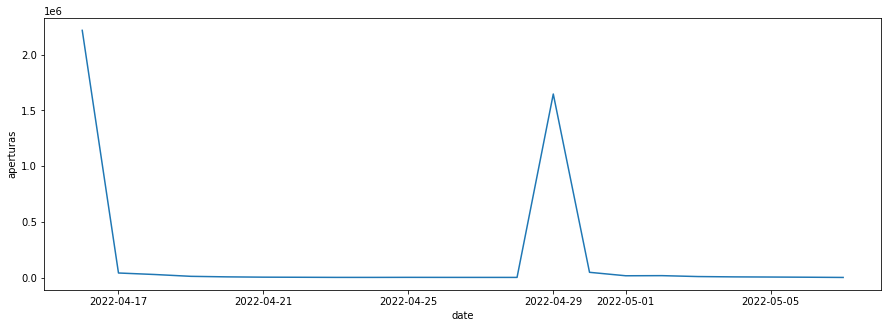

In [5]:
grafico = envios_efectivos.groupby('date').EMAIL.count().reset_index()
grafico.rename(columns={'EMAIL':'aperturas'},inplace=True)
fig, ax = plt.subplots(figsize=(15,5))
fig = sns.lineplot(data= grafico, x= "date",y= "aperturas")

In [ ]:
envios_efectivos.date.value_counts()

In [6]:
envios_efectivos.FECHA.min()

'2022-04-16 12:01:01.000'

In [7]:
envios_efectivos.FECHA.max()

'2022-05-07 11:51:38.330'

In [8]:
envios_efectivos.ACTIVIDAD.unique()

array(['Aperturas Originales', 'Contactos Sin Actividad'], dtype=object)

##### Ahora, tengo que eliminar duplicados pero priorizando a los que abrieron. Ordeno por ACTIVIDAD y FECHA y hago drop_duplicates

In [9]:
envios_efectivos.sort_values(by=['ACTIVIDAD','FECHA'],inplace=True)
envios_efectivos.head()

,FECHA,EMAIL,ACTIVIDAD,CAMPANIA,ACCION,date
2364,2022-04-16 12:01:10.097,cintia.vitullo@comafi.com.ar,Aperturas Originales,ABRIL 2022,R1 Recu 6y12 M ACT,2022-04-16
2737,2022-04-16 12:01:13.990,csanmartin@ocean.com.ar,Aperturas Originales,ABRIL 2022,R1 Recu 3y4 M ACT,2022-04-16
10921,2022-04-16 12:01:14.800,ricardomartin@mscontadores.com,Aperturas Originales,ABRIL 2022,R1 Recu 6y12 M ACT,2022-04-16
57,2022-04-16 12:01:20.717,acontreras@monroeamericana.com.ar,Aperturas Originales,ABRIL 2022,R1 Recu 3y4 M ACT,2022-04-16
11216,2022-04-16 12:01:21.403,rpacheco@ledesma.com.ar,Aperturas Originales,ABRIL 2022,R1 Recu 3y4 M ACT,2022-04-16


In [10]:
envios_efectivos.shape

(4061100, 6)

In [11]:
envios_efectivos.drop_duplicates(subset=['EMAIL'],inplace=True)
envios_efectivos.shape

(2307543, 6)

In [12]:
envios_efectivos.EMAIL.nunique() #Tiene que coincidir con shape 

2307543

#### Empiezo a sacar algún indicador...

In [13]:
print('Se enviaron mail a', envios_efectivos.EMAIL.nunique(),'personas')

Se enviaron mail a 2307543 personas


In [14]:
personas_abrieron = envios_efectivos[envios_efectivos.ACTIVIDAD == 'Aperturas Originales'].EMAIL.nunique()

print('Abrieron al menos un mail un total de',personas_abrieron,'personas, el',\
      round(personas_abrieron / envios_efectivos.EMAIL.nunique()*100,1),'% de las personas que recibieron mails')

Abrieron al menos un mail un total de 288334 personas, el 12.5 % de las personas que recibieron mails


In [15]:
print('No abrieron ningún mail un total de',envios_efectivos[envios_efectivos.ACTIVIDAD == 'Contactos Sin Actividad'].EMAIL.nunique(),'personas, el',\
      round(envios_efectivos[envios_efectivos.ACTIVIDAD == 'Contactos Sin Actividad'].EMAIL.nunique() / envios_efectivos.EMAIL.nunique()*100,1),'% de las personas que recibieron mails')

No abrieron ningún mail un total de 2019209 personas, el 87.5 % de las personas que recibieron mails


#### Importo los datos del DW

Importo Mail y CustomerId

In [16]:
DB = {'servername': '',
      'database': '',
      'usuario' :'',
      'contraseña':'',
      'Encrypt':'yes',
      'TrustServerCertificate':'no',
      'Connection Timeout':'30'}

# create the connection
conn = pyodbc.connect('DRIVER={ODBC Driver 13 for SQL Server};SERVER=' + DB['servername'] + ';DATABASE=' + DB['database'] +\
                      ';UID=' + DB['usuario'] + ';PWD='+ DB['contraseña'] + ';Encrypt=yes;TrustServerCertificate=no;Connection Timeout=30')

# query db
sql = """

SELECT c.Email, c.CustomerId
FROM dbo.Customer c
"""
clientes = pd.read_sql(sql, conn)
clientes.head()

,Email,CustomerId
0,lauucano@hotmail.com,B79717A1-4A53-C540-50FD-08D6528AF6B0
1,gisellerecalde.49@gmail.com,EE5417CB-B93D-C823-B792-08D65878DA6E
2,puquita_lalokiz@hotmail.com,A1736964-0AA5-CD90-2560-08D6BC5A1B2B
3,amalialujan231@gmail.com,7AB8EDA6-6788-CC17-9F06-08D9DAB662AE
4,mirtainez26@gmail.com,626EC073-0496-C5DF-9419-08D68FD4999B


In [17]:
envios_efectivos.shape

(2307543, 6)

In [18]:
envios_efectivos.EMAIL.nunique()

2307543

In [19]:
envios_efectivos = envios_efectivos.merge(clientes, how='left', left_on='EMAIL', right_on = 'Email')
envios_efectivos.head()

,FECHA,EMAIL,ACTIVIDAD,CAMPANIA,ACCION,date,Email,CustomerId
0,2022-04-16 12:01:10.097,cintia.vitullo@comafi.com.ar,Aperturas Originales,ABRIL 2022,R1 Recu 6y12 M ACT,2022-04-16,cintia.vitullo@comafi.com.ar,407B741C-39AB-CB63-85D3-08D61C161962
1,2022-04-16 12:01:13.990,csanmartin@ocean.com.ar,Aperturas Originales,ABRIL 2022,R1 Recu 3y4 M ACT,2022-04-16,csanmartin@ocean.com.ar,24EA9CBD-FE5A-C27B-3AFB-08D38883A04D
2,2022-04-16 12:01:14.800,ricardomartin@mscontadores.com,Aperturas Originales,ABRIL 2022,R1 Recu 6y12 M ACT,2022-04-16,ricardomartin@mscontadores.com,C9C91CE2-BB2E-C0A5-A847-08D706639B26
3,2022-04-16 12:01:20.717,acontreras@monroeamericana.com.ar,Aperturas Originales,ABRIL 2022,R1 Recu 3y4 M ACT,2022-04-16,acontreras@monroeamericana.com.ar,96F9D959-3275-CB75-E58B-08D42087F050
4,2022-04-16 12:01:21.403,rpacheco@ledesma.com.ar,Aperturas Originales,ABRIL 2022,R1 Recu 3y4 M ACT,2022-04-16,rpacheco@ledesma.com.ar,A65BA57E-E93D-C47F-A9E9-08D8FD1D7D6A


In [20]:
envios_efectivos.sort_values(by=['ACTIVIDAD','FECHA'],inplace=True)
envios_efectivos.drop_duplicates(subset=['EMAIL'],inplace=True)
envios_efectivos.shape

(2307543, 8)

In [21]:
envios_efectivos.EMAIL.nunique()

2307543

Importo ventas y lo cruzo con envios

In [22]:
DB = {'servername': '',
      'database': '',
      'usuario' :'',
      'contraseña':'',
      'Encrypt':'yes',
      'TrustServerCertificate':'no',
      'Connection Timeout':'30'}

# create the connection
conn = pyodbc.connect('DRIVER={ODBC Driver 13 for SQL Server};SERVER=' + DB['servername'] + ';DATABASE=' + DB['database'] +\
                      ';UID=' + DB['usuario'] + ';PWD='+ DB['contraseña'] + ';Encrypt=yes;TrustServerCertificate=no;Connection Timeout=30')

# query db
sql = """

SELECT sc.CustomerId, CONVERT(DATE,max(case when s.SaleDate < '2022-04-16' then s.SaleDate else '2020-01-01' end)) 'ultima_compra_antes_mail', CONVERT(DATE,max(s.SaleDate)) 'ultima_compra'
FROM dbo.Sale s
INNER JOIN dbo.SaleCustomer sc ON sc.SaleId = s.SaleId
WHERE s.SaleDate < '2022-05-07'
GROUP BY sc.CustomerId
"""
sale = pd.read_sql(sql, conn)
sale.head()

,CustomerId,ultima_compra_antes_mail,ultima_compra
0,520E7149-0DA1-CE6D-25CB-08D5A8128AE5,2020-01-07,2020-01-07
1,48AA9F37-DA8C-C1D4-BCB7-08D328C87085,2017-05-21,2017-05-21
2,BF44A47D-5532-C169-B82F-08D620C10116,2022-04-15,2022-04-15
3,57A20A20-0631-C9C5-5DF6-08D355AF622F,2022-03-06,2022-03-06
4,3CFE5BC1-723C-C7BD-923F-08D426B7277C,2022-03-03,2022-03-03


In [23]:
envios_efectivos = envios_efectivos.merge(sale, how='left',on = 'CustomerId')
envios_efectivos.head()

,FECHA,EMAIL,ACTIVIDAD,CAMPANIA,ACCION,date,Email,CustomerId,ultima_compra_antes_mail,ultima_compra
0,2022-04-16 12:01:10.097,cintia.vitullo@comafi.com.ar,Aperturas Originales,ABRIL 2022,R1 Recu 6y12 M ACT,2022-04-16,cintia.vitullo@comafi.com.ar,407B741C-39AB-CB63-85D3-08D61C161962,2021-09-15,2021-09-15
1,2022-04-16 12:01:13.990,csanmartin@ocean.com.ar,Aperturas Originales,ABRIL 2022,R1 Recu 3y4 M ACT,2022-04-16,csanmartin@ocean.com.ar,24EA9CBD-FE5A-C27B-3AFB-08D38883A04D,2021-12-20,2021-12-20
2,2022-04-16 12:01:14.800,ricardomartin@mscontadores.com,Aperturas Originales,ABRIL 2022,R1 Recu 6y12 M ACT,2022-04-16,ricardomartin@mscontadores.com,C9C91CE2-BB2E-C0A5-A847-08D706639B26,2021-04-12,2021-04-12
3,2022-04-16 12:01:20.717,acontreras@monroeamericana.com.ar,Aperturas Originales,ABRIL 2022,R1 Recu 3y4 M ACT,2022-04-16,acontreras@monroeamericana.com.ar,96F9D959-3275-CB75-E58B-08D42087F050,2022-01-06,2022-01-06
4,2022-04-16 12:01:21.403,rpacheco@ledesma.com.ar,Aperturas Originales,ABRIL 2022,R1 Recu 3y4 M ACT,2022-04-16,rpacheco@ledesma.com.ar,A65BA57E-E93D-C47F-A9E9-08D8FD1D7D6A,2021-12-17,2021-12-17


In [24]:
envios_efectivos['dias_inactivo_compras'] = (pd.to_datetime(envios_efectivos.ultima_compra) -  pd.to_datetime(envios_efectivos.ultima_compra_antes_mail)) / np.timedelta64(1,'D')

Importo canjes y lo cruzo con envios

In [25]:
DB = {'servername': '',
      'database': '',
      'usuario' :'',
      'contraseña':'',
      'Encrypt':'yes',
      'TrustServerCertificate':'no',
      'Connection Timeout':'30'}

# create the connection
conn = pyodbc.connect('DRIVER={ODBC Driver 13 for SQL Server};SERVER=' + DB['servername'] + ';DATABASE=' + DB['database'] +\
                      ';UID=' + DB['usuario'] + ';PWD='+ DB['contraseña'] + ';Encrypt=yes;TrustServerCertificate=no;Connection Timeout=30')

# query db
sql = """

SELECT e.CustomerId, CONVERT(DATE,max(case when e.ExchangeDate < '2022-04-16' then e.ExchangeDate else '2020-01-01' end)) 'ultimo_canje_antes_mail', CONVERT(DATE,max(e.ExchangeDate)) 'ultimo_canje'
FROM dbo.Exchange e
WHERE e.ExchangeDate < '2022-05-07'
GROUP BY e.CustomerId
"""
exchange = pd.read_sql(sql, conn)
exchange.head()

,CustomerId,ultimo_canje_antes_mail,ultimo_canje
0,04D3BFA6-8B9D-C253-FD96-08D6256C0613,2021-07-31,2021-07-31
1,642F7F07-F063-CECB-037E-08D4F33E99F7,2022-03-10,2022-03-10
2,CF8265CC-4C2B-C55C-0A63-08D2B6DBD0DB,2018-05-13,2018-05-13
3,5CD98A37-4C3B-C98F-417B-08D2C07E4461,2021-11-25,2021-11-25
4,87EEBC17-DF20-C1E3-CC91-08D46D91BB28,2019-08-04,2019-08-04


In [26]:
envios_efectivos = envios_efectivos.merge(exchange, how='left', on = 'CustomerId')
envios_efectivos.head()

,FECHA,EMAIL,ACTIVIDAD,CAMPANIA,ACCION,date,Email,CustomerId,ultima_compra_antes_mail,ultima_compra,dias_inactivo_compras,ultimo_canje_antes_mail,ultimo_canje
0,2022-04-16 12:01:10.097,cintia.vitullo@comafi.com.ar,Aperturas Originales,ABRIL 2022,R1 Recu 6y12 M ACT,2022-04-16,cintia.vitullo@comafi.com.ar,407B741C-39AB-CB63-85D3-08D61C161962,2021-09-15,2021-09-15,0.0,NaN,NaN
1,2022-04-16 12:01:13.990,csanmartin@ocean.com.ar,Aperturas Originales,ABRIL 2022,R1 Recu 3y4 M ACT,2022-04-16,csanmartin@ocean.com.ar,24EA9CBD-FE5A-C27B-3AFB-08D38883A04D,2021-12-20,2021-12-20,0.0,2016-11-05,2016-11-05
2,2022-04-16 12:01:14.800,ricardomartin@mscontadores.com,Aperturas Originales,ABRIL 2022,R1 Recu 6y12 M ACT,2022-04-16,ricardomartin@mscontadores.com,C9C91CE2-BB2E-C0A5-A847-08D706639B26,2021-04-12,2021-04-12,0.0,NaN,NaN
3,2022-04-16 12:01:20.717,acontreras@monroeamericana.com.ar,Aperturas Originales,ABRIL 2022,R1 Recu 3y4 M ACT,2022-04-16,acontreras@monroeamericana.com.ar,96F9D959-3275-CB75-E58B-08D42087F050,2022-01-06,2022-01-06,0.0,2021-12-22,2021-12-22
4,2022-04-16 12:01:21.403,rpacheco@ledesma.com.ar,Aperturas Originales,ABRIL 2022,R1 Recu 3y4 M ACT,2022-04-16,rpacheco@ledesma.com.ar,A65BA57E-E93D-C47F-A9E9-08D8FD1D7D6A,2021-12-17,2021-12-17,0.0,NaN,NaN


In [28]:
envios_efectivos['dias_inactivo_canjes'] = (pd.to_datetime(envios_efectivos.ultimo_canje) -  pd.to_datetime(envios_efectivos.ultimo_canje_antes_mail)) / np.timedelta64(1,'D')

In [29]:
envios_efectivos.isnull().sum()

FECHA                             0
EMAIL                             0
ACTIVIDAD                         0
CAMPANIA                          0
ACCION                            0
date                              0
Email                         10427
CustomerId                    10427
ultima_compra_antes_mail      13260
ultima_compra                 13260
dias_inactivo_compras         13260
ultimo_canje_antes_mail     1235484
ultimo_canje                1235484
dias_inactivo_canjes        1235484
dtype: int64

In [30]:
envios_efectivos[envios_efectivos.Email.isnull()].ACTIVIDAD.value_counts()

Contactos Sin Actividad    9322
Aperturas Originales       1105
Name: ACTIVIDAD, dtype: int64

Tengo algunos socios que no puedo cruzarlos con canjes y ventas pero +91% no abrieron 

In [31]:
abrieron_y_reactivaron = envios_efectivos[(envios_efectivos.ACTIVIDAD == 'Aperturas Originales') & ((envios_efectivos.dias_inactivo_canjes > 0) | (envios_efectivos.dias_inactivo_compras > 0))]
abrieron_y_reactivaron.shape

(80986, 14)

In [32]:
abrieron_y_reactivaron.EMAIL.nunique()

80986

In [33]:
abrieron_y_reactivaron.isnull().sum()

FECHA                           0
EMAIL                           0
ACTIVIDAD                       0
CAMPANIA                        0
ACCION                          0
date                            0
Email                           0
CustomerId                      0
ultima_compra_antes_mail        0
ultima_compra                   0
dias_inactivo_compras           0
ultimo_canje_antes_mail     22580
ultimo_canje                22580
dias_inactivo_canjes        22580
dtype: int64

In [35]:
abrieron_y_reactivaron['ultima_compra_antes_mail'] = pd.to_datetime(abrieron_y_reactivaron['ultima_compra_antes_mail'])
abrieron_y_reactivaron['ultima_compra'] = pd.to_datetime(abrieron_y_reactivaron['ultima_compra'])
abrieron_y_reactivaron['ultimo_canje_antes_mail'] = pd.to_datetime(abrieron_y_reactivaron['ultimo_canje_antes_mail'])
abrieron_y_reactivaron['ultimo_canje'] = pd.to_datetime(abrieron_y_reactivaron['ultimo_canje'])

C:\Users\pnovero\AppData\Local\Temp\3/ipykernel_18736/3832541624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abrieron_y_reactivaron['ultima_compra_antes_mail'] = pd.to_datetime(abrieron_y_reactivaron['ultima_compra_antes_mail'])
C:\Users\pnovero\AppData\Local\Temp\3/ipykernel_18736/3832541624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abrieron_y_reactivaron['ultima_compra'] = pd.to_datetime(abrieron_y_reactivaron['ultima_compra'])
C:\Users\pnovero\AppData\Local\Temp\3/ipykernel_18736/383254

In [268]:
abrieron_y_reactivaron.ultima_compra_antes_mail.fillna(abrieron_y_reactivaron.ultima_compra_antes_mail.min(),inplace=True)
abrieron_y_reactivaron.ultima_compra.fillna(abrieron_y_reactivaron.ultima_compra.min(),inplace=True)
abrieron_y_reactivaron.ultimo_canje_antes_mail.fillna(abrieron_y_reactivaron.ultio_canje_antes_mail.min(),inplace=True)
abrieron_y_reactivaron.ultimo_canje.fillna(abrieron_y_reactivaron.ultimo_canje.min(),inplace=True)

abrieron_y_reactivaron.dias_inactivo_compras.fillna(0,inplace=True)
abrieron_y_reactivaron.dias_inactivo_canjes.fillna(0,inplace=True)

C:\Users\pnovero\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [36]:
abrieron_y_reactivaron.dtypes

FECHA                               object
EMAIL                               object
ACTIVIDAD                           object
CAMPANIA                            object
ACCION                              object
date                                object
Email                               object
CustomerId                          object
ultima_compra_antes_mail    datetime64[ns]
ultima_compra               datetime64[ns]
dias_inactivo_compras              float64
ultimo_canje_antes_mail     datetime64[ns]
ultimo_canje                datetime64[ns]
dias_inactivo_canjes               float64
dtype: object

In [37]:
abrieron_y_reactivaron.ultima_compra_antes_mail.fillna()

ValueError: Must specify a fill 'value' or 'method'.

A continuación, obtengo la fecha de actividad previa al mail y la primera fecha de reactivacion post mail considerando Canjes y Ventas

In [39]:
abrieron_y_reactivaron['ult_fecha_actividad'] = abrieron_y_reactivaron[['ultima_compra_antes_mail','ultimo_canje_antes_mail']].max(axis=1)
abrieron_y_reactivaron['nueva_fecha_actividad'] = abrieron_y_reactivaron[['ultima_compra','ultimo_canje']].max(axis=1)

abrieron_y_reactivaron['dias_inactivo'] = (pd.to_datetime(abrieron_y_reactivaron.nueva_fecha_actividad) -  pd.to_datetime(abrieron_y_reactivaron.ult_fecha_actividad)) / np.timedelta64(1,'D')
abrieron_y_reactivaron.head()

C:\Users\pnovero\AppData\Local\Temp\3/ipykernel_18736/2344525402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abrieron_y_reactivaron['ult_fecha_actividad'] = abrieron_y_reactivaron[['ultima_compra_antes_mail','ultimo_canje_antes_mail']].max(axis=1)
C:\Users\pnovero\AppData\Local\Temp\3/ipykernel_18736/2344525402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abrieron_y_reactivaron['nueva_fecha_actividad'] = abrieron_y_reactivaron[['ultima_compra','ultimo_canje']].max(axis=1)
C:\Users\pnovero\App

,FECHA,EMAIL,ACTIVIDAD,CAMPANIA,ACCION,date,Email,CustomerId,ultima_compra_antes_mail,ultima_compra,dias_inactivo_compras,ultimo_canje_antes_mail,ultimo_canje,dias_inactivo_canjes,ult_fecha_actividad,nueva_fecha_actividad,dias_inactivo
6,2022-04-16 12:01:23.720,ourzagasti@ledesma.com.ar,Aperturas Originales,ABRIL 2022,R1 Recu 6y12 M ACT,2022-04-16,ourzagasti@ledesma.com.ar,01E06E74-CA80-C559-7F97-08D97DDF265B,2021-09-22,2022-04-19,209.0,NaT,NaT,NaN,2021-09-22,2022-04-19,209.0
15,2022-04-16 12:01:34.863,joaquin@jsalas.com.ar,Aperturas Originales,ABRIL 2022,R1 Recu 3y4 M ACT,2022-04-16,joaquin@jsalas.com.ar,D90DEF06-935D-CBFD-527C-08D694313FE8,2021-12-31,2022-05-01,121.0,2022-02-27,2022-02-27,0.0,2022-02-27,2022-05-01,63.0
28,2022-04-16 12:01:43.073,vdvanesadominguez@gmail.com,Aperturas Originales,ABRIL 2022,R1 Recu 6y12 M ACT,2022-04-16,vdvanesadominguez@gmail.com,CBBE861E-1264-C074-8EA6-08D4ECA4432D,2022-04-09,2022-04-23,14.0,2020-01-01,2022-04-23,843.0,2022-04-09,2022-04-23,14.0
29,2022-04-16 12:01:43.180,rfiorito@gmail.com,Aperturas Originales,ABRIL 2022,R1 Recu 3y4 M ACT,2022-04-16,rfiorito@gmail.com,29E1F528-538D-CDF6-C754-08D8A8F2052A,2021-12-31,2022-04-26,116.0,NaT,NaT,NaN,2021-12-31,2022-04-26,116.0
33,2022-04-16 12:01:45.743,hsayago@makro.com.ar,Aperturas Originales,ABRIL 2022,R1 Recu 3y4 M ACT,2022-04-16,hsayago@makro.com.ar,FE39C9E9-DE13-CE32-0D8D-08D5383CF200,2021-12-16,2022-04-16,121.0,2019-10-06,2019-10-06,0.0,2021-12-16,2022-04-16,121.0


C:\Users\pnovero\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


90.36071666707826

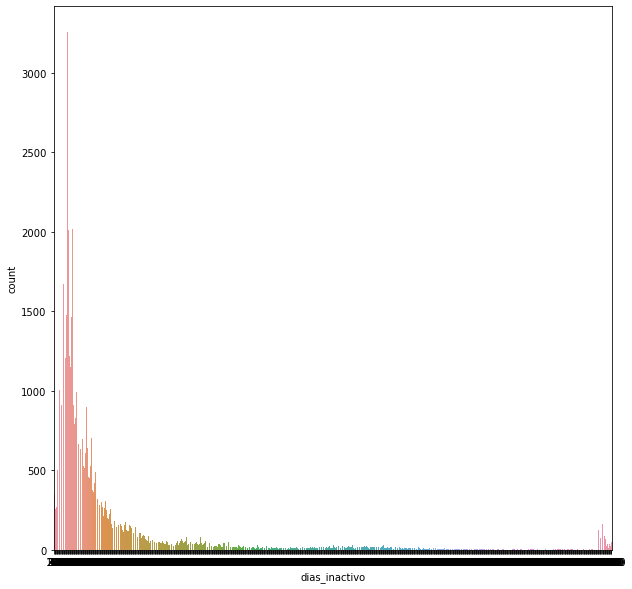

In [43]:
plt.figure(figsize=(10,10))
sns.countplot(abrieron_y_reactivaron['dias_inactivo'])
abrieron_y_reactivaron['dias_inactivo'].mean()

In [41]:
abrieron_y_reactivaron['dias_inactivo'].median()

36.0

In [42]:
abrieron_y_reactivaron['dias_inactivo'].std()

152.71990758266145

#### Saco nuevos indicadores

In [44]:
print('De todos los que abrieron,', abrieron_y_reactivaron.shape[0],'(',round(abrieron_y_reactivaron.shape[0]/personas_abrieron*100,1),'%) se reactivaron luego ya sea canjeando o comprando')

De todos los que abrieron, 80986 ( 28.1 %) se reactivaron luego ya sea canjeando o comprando


In [45]:
clusters = [-np.inf,30,60,90,120,180,365,730,np.inf]
nombres_clusters = ['Menos de 1 mes','Entre 1 y 2 meses','Entre 2 y 3 meses','Entre 3 y 4 meses','Entre 4 y 6 meses','Entre 6 y 12 meses','Entre 12 y 24 meses','Más de 24 meses']
abrieron_y_reactivaron['segmento_ultima_actividad'] = pd.cut(abrieron_y_reactivaron.dias_inactivo,bins= clusters, labels = nombres_clusters)

C:\Users\pnovero\AppData\Local\Temp\3/ipykernel_18736/3023622449.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abrieron_y_reactivaron['segmento_ultima_actividad'] = pd.cut(abrieron_y_reactivaron.dias_inactivo,bins= clusters, labels = nombres_clusters)


In [46]:
import sidetable as stb
abrieron_y_reactivaron.stb.freq(['segmento_ultima_actividad'],sort_cols=clusters)

,segmento_ultima_actividad,count,percent,cumulative_count,cumulative_percent
0,Menos de 1 mes,35449,43.771763,35449,43.771763
1,Entre 1 y 2 meses,19565,24.158497,55014,67.930260
2,Entre 2 y 3 meses,8367,10.331415,63381,78.261675
3,Entre 3 y 4 meses,4314,5.326847,67695,83.588521
4,Entre 4 y 6 meses,3562,4.398291,71257,87.986813
5,Entre 6 y 12 meses,4541,5.607142,75798,93.593955
6,Entre 12 y 24 meses,3454,4.264935,79252,97.858889
7,Más de 24 meses,1734,2.141111,80986,100.000000


In [47]:
!pip install sidetable

<Figure size 432x288 with 0 Axes>

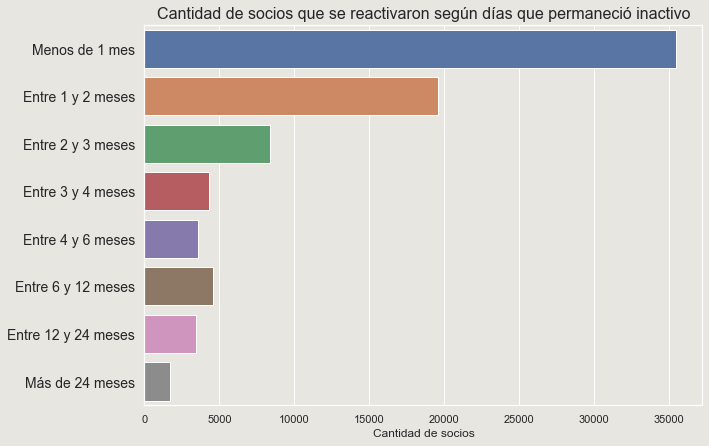

In [48]:
sns.set(rc={"axes.facecolor":"#E8E6E1","figure.facecolor":"#E8E6E1"})
sns.despine()

fig, ax = plt.subplots(figsize=(10,7))
plt.title('Cantidad de socios que se reactivaron según días que permaneció inactivo',fontsize=16)
fig= sns.countplot(y=abrieron_y_reactivaron.segmento_ultima_actividad)
ax.set_xlabel('Cantidad de socios',loc='center')
ax.set_ylabel('',loc='center')
ax.tick_params(axis='y', labelsize=14)

In [49]:
abrieron_y_reactivaron['compra_o_canje'] = np.where(abrieron_y_reactivaron.ultimo_canje == abrieron_y_reactivaron.nueva_fecha_actividad,'Canje',np.where(abrieron_y_reactivaron.ultima_compra == abrieron_y_reactivaron.nueva_fecha_actividad,'Compra','ERROR'))

C:\Users\pnovero\AppData\Local\Temp\3/ipykernel_18736/1777119433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abrieron_y_reactivaron['compra_o_canje'] = np.where(abrieron_y_reactivaron.ultimo_canje == abrieron_y_reactivaron.nueva_fecha_actividad,'Canje',np.where(abrieron_y_reactivaron.ultima_compra == abrieron_y_reactivaron.nueva_fecha_actividad,'Compra','ERROR'))


In [50]:
abrieron_y_reactivaron.stb.freq(['compra_o_canje'])

,compra_o_canje,count,percent,cumulative_count,cumulative_percent
0,Compra,64857,80.084212,64857,80.084212
1,Canje,16129,19.915788,80986,100.000000


In [51]:
abrieron_y_reactivaron[['ultimo_canje','ultima_compra','nueva_fecha_actividad','compra_o_canje']].head(1000)

,ultimo_canje,ultima_compra,nueva_fecha_actividad,compra_o_canje
6,NaT,2022-04-19,2022-04-19,Compra
15,2022-02-27,2022-05-01,2022-05-01,Compra
28,2022-04-23,2022-04-23,2022-04-23,Canje
29,NaT,2022-04-26,2022-04-26,Compra
33,2019-10-06,2022-04-16,2022-04-16,Compra
36,NaT,2022-04-18,2022-04-18,Compra
51,NaT,2022-05-03,2022-05-03,Compra
53,2022-04-26,2022-04-26,2022-04-26,Canje
56,2020-02-10,2022-04-22,2022-04-22,Compra
60,2022-04-23,2022-04-17,2022-04-23,Canje
